<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/GMM_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Data_info.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Explore dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#Check for missing values
print('--Columns and the number of missing values--')
df.isna().sum()

--Columns and the number of missing values--


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

#Data Preprocessing

In [ ]:
#Separate numerical and categorical columns.
numerical_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Print lists of columns
print("Numerical features:", numerical_features)
print("Categorical columns:", categorical_features)

Numerical features: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Categorical columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [ ]:
#Fill missing values in numeric columns with mean.
for num in numerical_features:
    df[num].fillna(df[num].mean(), inplace=True)

#Fill missing values in categorical columns with most frequent value.
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
#Perform one-hot encoding for categorical columns.
df = pd.get_dummies(df, drop_first=True)
print ('There are {} columns in the updated df now'.format (df.shape[1]))
df.info()

There are 23 columns in the updated df now
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    bool   
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    bool   
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   num                       920 non-null    int64  
 10  sex_Male                  920 non-null    bool   
 11  dataset_Hungary           920 non-null    bool   
 12  dataset_Switzerland       920 non-null    bool   
 13  dataset_VA Long Beach 

#Feature Selection

In [ ]:
#Assume all features are relevant
selected_features = df.columns

#Standardization

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])
print(df_scaled)

[[-1.73016917  1.00738556  0.69804099 ... -0.5320941  -1.69279243
  -0.51355259]
 [-1.72640384  1.43203377  1.51176059 ... -0.5320941   0.59073988
  -0.51355259]
 [-1.72263851  1.43203377 -0.65815834 ... -0.5320941  -1.69279243
   1.94722024]
 ...
 [ 1.72263851  0.15808914 -0.54966239 ... -0.5320941  -1.69279243
  -0.51355259]
 [ 1.72640384  0.4765753   0.         ... -0.5320941   0.59073988
  -0.51355259]
 [ 1.73016917  0.90122351 -0.65815834 ... -0.5320941   0.59073988
  -0.51355259]]


#Gaussian Mixture Model (GMM) Clustering

In [ ]:
n_components = 3 #number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(df_scaled)

labels = gmm.predict(df_scaled)

In [ ]:
df['Cluster'] = labels

#Visualization

##Visualize the clusters using two principal components.

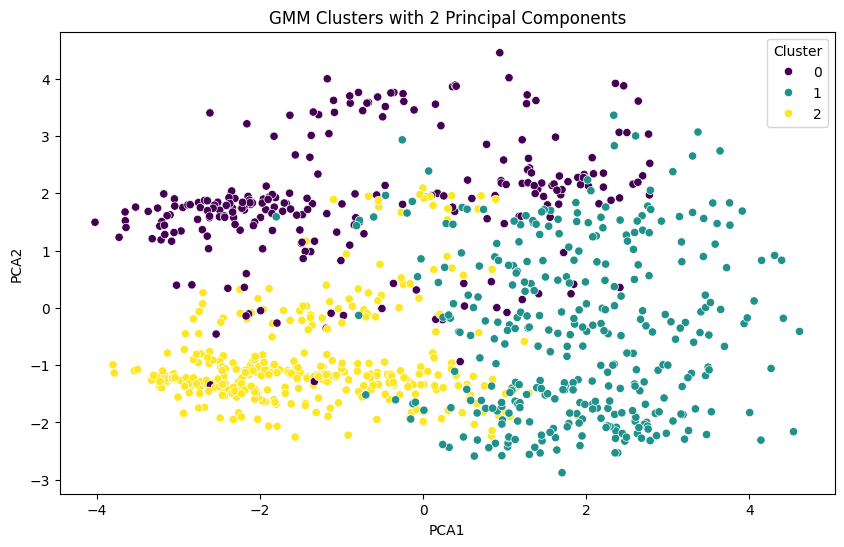

In [ ]:
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(df_scaled)
df['PCA1'] = data_pca_2[:, 0]
df['PCA2'] = data_pca_2[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('GMM Clusters with 2 Principal Components')
plt.show()

##Visualize the clusters using three principal components

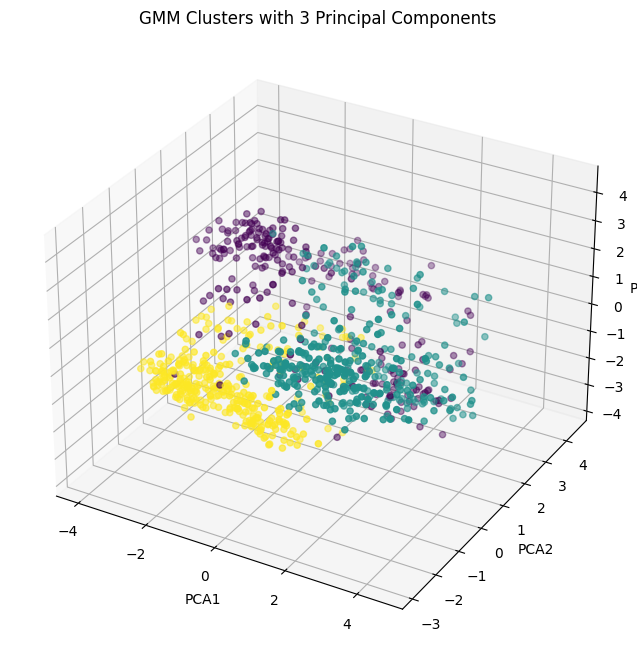

In [ ]:
# Visualize the clusters using three principal components
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(df_scaled)
df['PCA3'] = data_pca_3[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('GMM Clusters with 3 Principal Components')
plt.show()

##Interpret the clustering results and observe the separation of clusters.

In [ ]:
print(df.groupby('Cluster').mean())

                 id        age    trestbps        chol       fbs      thalch  \
Cluster                                                                        
0        166.689796  54.012245  131.857683  246.727595  0.146939  150.602227   
1        735.341246  57.863501  132.447120  115.981936  0.231454  125.072599   
2        399.440828  48.807692  132.017751  247.531767  0.071006  140.517751   

            exang   oldpeak        ca       num  ...  cp_typical angina  \
Cluster                                          ...                      
0        0.310204  0.995102  0.792550  0.955102  ...           0.065306   
1        0.462908  1.029332  0.714346  1.640950  ...           0.038576   
2        0.310651  0.644379  0.554308  0.381657  ...           0.050296   

         restecg_normal  restecg_st-t abnormality  slope_flat  \
Cluster                                                         
0              0.526531                  0.020408    0.302041   
1              0.501484     

In [ ]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
2    338
1    337
0    245
Name: count, dtype: int64


#**END**